In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("Car_sales.csv")
print(df)

      Manufacturer              Model  Sales in thousands 4-year resale value  \
0    Acura          Integra                        16.919               16.36   
1    Acura          TL                             39.384              19.875   
2    Acura          CL                             14.114              18.225   
3    Acura          RL                              8.588              29.725   
4    Audi           A4                             20.397              22.255   
..             ...                ...                 ...                 ...   
152  Volvo          V40                             3.545                   .   
153  Volvo          S70                            15.245                   .   
154  Volvo          V70                            17.531                   .   
155  Volvo          C70                             3.493                   .   
156  Volvo          S80                            18.969                   .   

    Vehicle type Price in t

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [4]:
df.describe()

,Sales in thousands
count,157.000000
mean,52.998076
std,68.029422
min,0.110000
25%,14.114000
50%,29.450000
75%,67.956000
max,540.561000


Clean the data

In [12]:
df.replace([".","NA","?"],np.nan,inplace=True)


In [11]:
print("Dataset columns: \n",df.columns)

non_numeric_val = [
    "Sales in thousands",
    "4-year resale value",
    "Price in thousands",
    "Engine size",
    "Horsepower",
    "Wheelbase",
    "Width",
    "Fuel capacity",
    "Fuel efficiency"
]

Existing_columns = [col for col in non_numeric_val if col in df.columns]

df[Existing_columns] = df[Existing_columns].apply(pd.to_numeric, errors="coerce")

df.fillna(df[Existing_columns].mean(numeric_only=True),inplace=True)

print("cleaned Dataset:\n", df.head())

Dataset columns: 
 Index(['Manufacturer', 'Model', 'Sales in thousands', '4-year resale value',
       'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency', 'Latest Launch'],
      dtype='object')
cleaned Dataset:
     Manufacturer              Model  Sales in thousands  4-year resale value  \
0  Acura          Integra                        16.919               16.360   
1  Acura          TL                             39.384               19.875   
2  Acura          CL                             14.114               18.225   
3  Acura          RL                              8.588               29.725   
4  Audi           A4                             20.397               22.255   

  Vehicle type  Price in thousands  Engine size  Horsepower  Wheelbase  Width  \
0    Passenger           21.500000          1.8       140.0      101.2   67.3   
1    Passenger           28.4000

Test train slip and Model training 

In [14]:
from sklearn.metrics import d2_absolute_error_score,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Ensure there are no NaNs left
df.fillna(df.mean(numeric_only=True), inplace=True)

# Features and target variable
x = df[["Engine size", "Horsepower", "Wheelbase", "Width", "Fuel efficiency"]]
y = df["Price in thousands"]

# Split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check and remove any remaining NaN values
x_train.dropna(inplace=True)
x_test.dropna(inplace=True)
y_train = y_train.loc[x_train.index]
y_test = y_test.loc[x_test.index]

# Train linear regression model
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

# Predict
y_predict = LR_model.predict(x_test)

# Evaluate Model
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_predict)

print("Mean Squared Error: ", MSE)
print("Root Mean Squared Error: ", RMSE)
print("R2 Score: ", r2)






Mean Squared Error:  102.91412927288758
Root Mean Squared Error:  10.144660135898471
R2 Score:  0.700508182413878


Classification:
ROC-AUC, Precision,Recall and F1-score 

ROC-AUC Score 0.9325396825396826


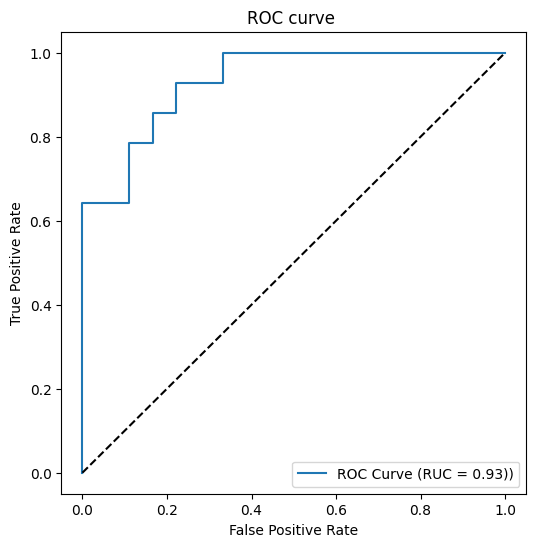

In [16]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve ,f1_score
import matplotlib.pyplot as plt
#create a binary target(Luxury vs non luxury)
#creates a new column called "Luxury", which categorizes cars as luxury or non-luxury based on their price.
df["Luxury"] = (df["Price in thousands"] > 30).astype(int)

#Define features and target 
x_class = df[["Engine size","Horsepower","Wheelbase","Width","Fuel efficiency"]]
y_class = df["Luxury"]

#Train test split
x_train_class,x_test_class,y_train_class,y_test_class = train_test_split(x_class,y_class,test_size=0.2,random_state=42)

#linear Regresion Model
L_model_class = LinearRegression()
L_model_class.fit(x_train_class,y_train_class)

#predicted Probabilities
y_predicted_prob = L_model_class.predict(x_test_class)

#Calculating ROC-AUC Scores
AUC_SCORE = roc_auc_score(y_test_class,y_predicted_prob)
print("ROC-AUC Score",AUC_SCORE)

#Plot the ROC Curve
fbr, tbr , _ = roc_curve(y_test_class,y_predicted_prob)
plt.figure(figsize=(6,6))
plt.plot(fbr,tbr,label="ROC Curve (RUC = {:.2f}))".format(AUC_SCORE))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve ")
plt.legend()
plt.show()


